In [1]:
import sys
import os

# Adiciona o diretório correto ao path
# Ajuste o caminho conforme sua estrutura real
sys.path.insert(0, os.getcwd())
print(f"✅ Diretório atual adicionado ao path: {os.getcwd()}")

from fuzzy_systems.learning.mamdani import MamdaniLearning
from fuzzy_systems.learning.metaheuristics import BinaryGA
from fuzzy_systems.learning.mandani_learning import MamdaniLearning
from fuzzy_systems import MamdaniSystem


import numpy as np
import matplotlib.pyplot as plt

# Configurar matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['figure.dpi'] = 100

print("✅ Bibliotecas importadas com sucesso!")
print(f"   Versão do NumPy: {np.__version__}")


from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import pandas as pd


✅ Diretório atual adicionado ao path: /Users/1moi6/Desktop/Minicurso Fuzzy/fuzzy_systems
✅ MamdaniLearning implementado com sucesso!

Características:
  • Aprendizado por gradiente: batch, online, mini-batch
  • Otimização metaheurística: PSO, DE, GA
  • Defuzzificação: COG e COS
  • Caching de ativações para otimização eficiente
  • Extração de regras linguísticas
✅ Módulo de EDO Fuzzy implementado com sucesso!

Características:
  • Integração completa com fuzzy_systems.core
  • Suporte a FuzzySet, triangular, gaussiana, trapezoidal
  • Método de α-níveis vetorizado
  • Paralelização automática (joblib)
  • Condições iniciais e parâmetros fuzzy
  • Visualização de envelopes por α-nível
✅ Bibliotecas importadas com sucesso!
   Versão do NumPy: 2.2.6


In [50]:
learner = MamdaniLearning(fis, num_points=1000, verbose=True)

In [53]:
learner.fit_rules(
            X_train, y_train,
            optimizer='sa',
            optimizer_params={'temperature_init': 100.0, 'cooling_rate': 0.95, 'max_iterations': 5000,'temperature_min': 1e-6},
            initial_solution_method='random'
        )

y_pred_train = learner.predict(X_train)
y_pred_test = learner.predict(X_test)

rmse_train = learner.get_cost()
rmse_test = learner.score(X_test, y_test)


📚 MAMDANI FUZZY RULE LEARNING
Optimizer: SA

🔧 Creating efficient FIS representation:
 - Input variables: 1
 - MFs per input: [7]
 - Output MFs: 7
 - AND operator: TNorm.MIN
 - Implication: min
 - Aggregation: max
 - Defuzzification: DefuzzMethod.CENTROID
 - Total rules: 7

Dataset size: 50 samples

Pre-computing rule activations...
Pre-computed activations: shape (50, 7)
 - 50 samples
 - 7 rules

Initialization method: random
Simulated Annealing - Optimization
Initial cost: 0.985102
Initial temperature: 100.00
Iter    1 | T= 95.00 | New best solution! Cost: 0.845707
Iter    3 | T= 85.74 | New best solution! Cost: 0.825954
Iter    6 | T= 73.51 | New best solution! Cost: 0.728226
Iter    7 | T= 69.83 | New best solution! Cost: 0.431120
Iter   21 | T= 34.06 | New best solution! Cost: 0.423693
Iter   35 | T= 16.61 | New best solution! Cost: 0.420559
Iter   36 | T= 15.78 | New best solution! Cost: 0.375012
Iter   57 | T=  5.37 | New best solution! Cost: 0.237027
Iter   59 | T=  4.85 | New

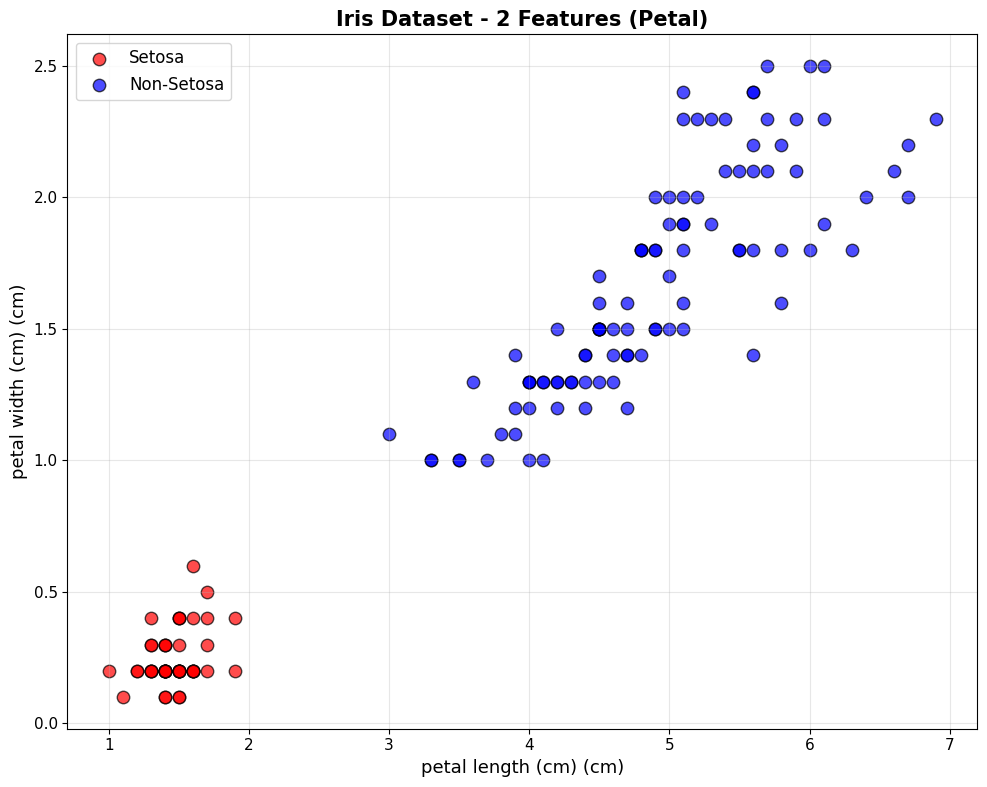

Feature 1 - Train: [-1.51, 1.78] | Validation: [-1.46, 1.32] | Test: [-1.57, 1.21]
Feature 2 - Train: [-1.45, 1.76] | Validation: [-1.32, 1.76] | Test: [-1.32, 1.49]


In [5]:
# Load dataset
iris = load_iris()

X = iris.data # Shape (150, 4) - 4 features
y = iris.target
y_binary = (y != 0).astype(int)  # 0 = Setosa, 1 = Não-Setosa


feature_names = iris.feature_names 
class_names = iris.target_names

X = X[:,2:4]
feature_names = ['Petal Length (cm)', 'Petal Width (cm)']
class_names = ['setosa', 'versicolor', 'virginica']


#Visualize separability
fig, ax = plt.subplots(figsize=(10, 8))

colors = ['red', 'blue']
labels = ['Setosa', 'Non-Setosa']

for class_id in [0, 1]:
    mask = y_binary == class_id
    ax.scatter(X[mask, -2], X[mask, -1], 
              c=colors[class_id], label=labels[class_id],
              s=80, alpha=0.7, edgecolors='black', linewidth=1)

ax.set_xlabel(iris.feature_names[-2] + ' (cm)', fontsize=13)
ax.set_ylabel(iris.feature_names[-1] + ' (cm)', fontsize=13)
ax.set_title('Iris Dataset - 2 Features (Petal)', fontsize=15, weight='bold')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_binary, test_size=0.3, random_state=42, stratify=y_binary
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Normalize data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)


for i in range(X_train.shape[1]):
    print(f'Feature {i+1} - Train: [{X_train_norm[:, i].min():.2f}, {X_train_norm[:, i].max():.2f}] | '
          f'Validation: [{X_val_norm[:, i].min():.2f}, {X_val_norm[:, i].max():.2f}] | '
          f'Test: [{X_test_norm[:, i].min():.2f}, {X_test_norm[:, i].max():.2f}]')

In [30]:
# ==================== 3. CRIAR SISTEMA FUZZY ====================

fis = MamdaniSystem()
num_features = X_train.shape[1]
num_input_mfs = 2
for idx in range(num_features):
    universe = (X_train_norm[:,idx].min(), X_train_norm[:,idx].max())
    fis.add_input(feature_names[idx], universe)
    input_centers = np.linspace(universe[0], universe[1], num_input_mfs)
    del_in = (input_centers[1]-input_centers[0])
    for i in range(num_input_mfs):
        a =  input_centers[i] - del_in
        b =  input_centers[i]
        c =  input_centers[i] + del_in
        fis.add_term(feature_names[idx], f'MF_{i+1}', 'triangular', (a, b, c))


fis.add_output('setosa', (0, 1))
num_output_mfs = 2
fis.add_term('setosa', 'No', 'triangular', (0, 0.0, 1.0))
fis.add_term('setosa', 'Yes', 'triangular', (0.0, 1.0, 1.0))
fis.info()


📊 INFORMAÇÕES DO SISTEMA: Mamdani FIS

🔧 Tipo: MamdaniSystem
📝 Nome: Mamdani FIS

📥 VARIÁVEIS DE ENTRADA (2):
──────────────────────────────────────────────────────────────────────
  1. 'Petal Length (cm)'
     Universo: (np.float64(-1.5146935153273549), np.float64(1.7762388815130257))
     Termos (2): 'MF_1', 'MF_2'

  2. 'Petal Width (cm)'
     Universo: (np.float64(-1.449135217174122), np.float64(1.7570287400504496))
     Termos (2): 'MF_1', 'MF_2'

📤 VARIÁVEIS DE SAÍDA (1):
──────────────────────────────────────────────────────────────────────
  1. 'setosa'
     Universo: (0, 1)
     Termos (2): 'No', 'Yes'

📋 REGRAS:
──────────────────────────────────────────────────────────────────────
  Total: 0 regras

⚙️  CONFIGURAÇÕES:
──────────────────────────────────────────────────────────────────────
  Defuzzificação: DefuzzMethod.CENTROID

💡 EXEMPLO DE USO:
──────────────────────────────────────────────────────────────────────
  # Adicionar uma regra (sintaxe recomendada - tupla plana)

In [ ]:
learner = MamdaniLearning(fis, num_points=1000, verbose=True)

In [32]:
learner.fit_rules(
            X_train_norm, y_train,
            optimizer='sa',
            optimizer_params={'temperature_init': 100.0, 'cooling_rate': 0.95, 'max_iterations': 5000,'temperature_min': 1e-6},
            initial_solution_method='random'
        )

y_pred_train = learner.predict(X_train_norm)
y_pred_test = learner.predict(X_test_norm)

rmse_train = learner.get_cost()
rmse_test = learner.score(X_test_norm, y_test)


📚 MAMDANI FUZZY RULE LEARNING
Optimizer: SA

🔧 Creating efficient FIS representation:
 - Input variables: 2
 - MFs per input: [2, 2]
 - Output MFs: 2
 - AND operator: TNorm.MIN
 - Implication: min
 - Aggregation: max
 - Defuzzification: DefuzzMethod.CENTROID
 - Total rules: 4

⚠️  Rule base is empty - creating from input combinations...
 - Terms per variable: [2, 2]
 - Total rules to create: 4
✅ Created 4 rules

Dataset size: 105 samples

Pre-computing rule activations...
Pre-computed activations: shape (105, 4)
 - 105 samples
 - 4 rules

Initialization method: random
Simulated Annealing - Optimization
Initial cost: 0.505462
Initial temperature: 100.00
Iter    6 | T= 73.51 | New best solution! Cost: 0.403972
Iter  100 | T=  0.56 | Current cost: 0.598149 | Best: 0.403972 | Acceptance rate: 99.0%
Iter  200 | T=  0.00 | Current cost: 0.403972 | Best: 0.403972 | Acceptance rate: 63.0%
Iter  300 | T=  0.00 | Current cost: 0.403972 | Best: 0.403972 | Acceptance rate: 13.0%

Minimum temperat

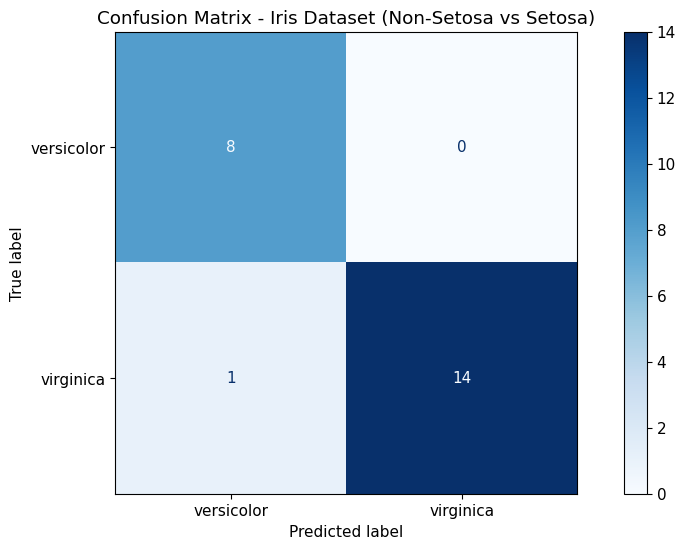

In [33]:
y_pred_test_classes = (y_pred_test >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_test_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names[1:])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Iris Dataset (Non-Setosa vs Setosa)')
plt.show()

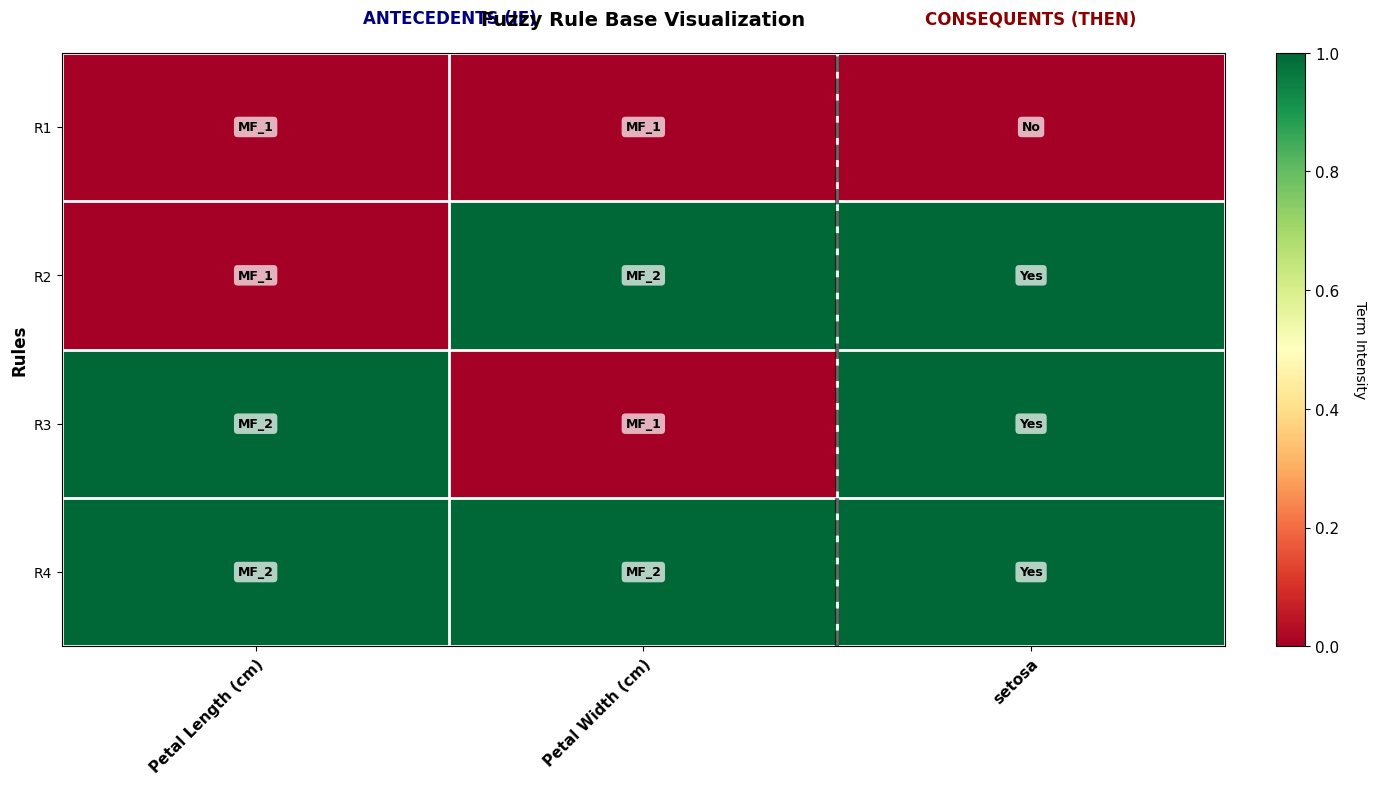

In [34]:
rule_matrix = fis.plot_rule_matrix()

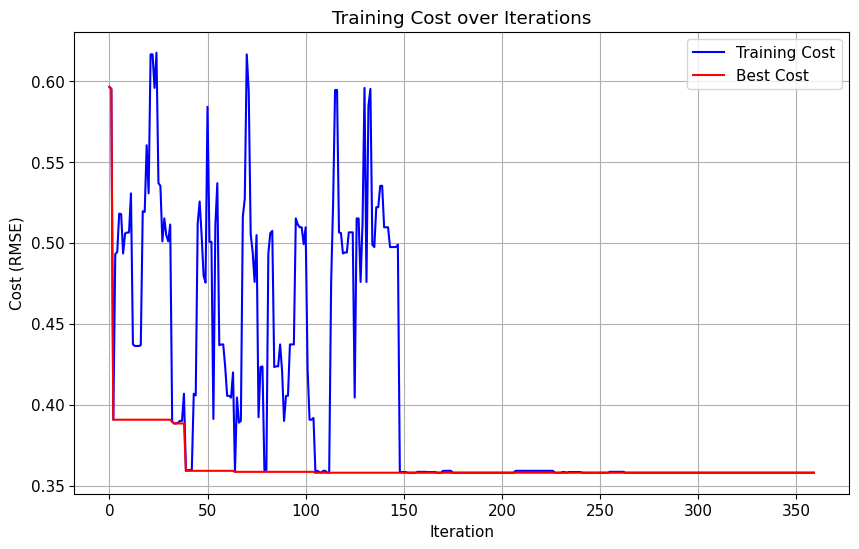

In [29]:
history = learner.get_history()
plt.figure(figsize=(10, 6))
plt.plot(history['current_cost'], label='Training Cost', color='blue')
plt.plot(history['best_cost'], label='Best Cost', color='red')
plt.xlabel('Iteration')
plt.ylabel('Cost (RMSE)')
plt.title('Training Cost over Iterations')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
df = fis.rules_to_dataframe()
df

,rule_id,Petal Length (cm),Petal Width (cm),setosa,operator,weight
0,1,MF_1,MF_1,No,AND,1.0
1,2,MF_1,MF_2,Yes,AND,1.0
2,3,MF_2,MF_1,Yes,AND,1.0
3,4,MF_2,MF_2,Yes,AND,1.0


In [40]:
# Configurações dos otimizadores
optimizers_config = {
    'SA': {
        'optimizer': 'sa',
        'params': {
            'temperature_init': 100.0,
            'cooling_rate': 0.95,
            'max_iterations': 2000,
            'plateau_iterations': 500,
            'temperature_min': 1e-6
        }
    },
    'GA': {
        'optimizer': 'ga',
        'params': {
            'pop_size': 50,
            'max_gen': 100,
            'mutation_rate': 0.1,
            'crossover_rate': 0.8
        }
    },
    'PSO': {
        'optimizer': 'pso',
        'params': {
            'n_particles': 30,
            'n_iterations': 100,
            'w_max': 0.9,
            'w_min': 0.4
        }
    },
    'DE': {
        'optimizer': 'de',
        'params': {
            'pop_size': 30,
            'max_iter': 100,
            'F': 0.8,
            'CR': 0.7
        }
    }
}


In [44]:
learner = MamdaniLearning(fis, num_points=1000, verbose=True)
optimizer ='GA'
learner.fit_rules(
            X_train_norm, y_train,
            optimizer=optimizers_config[optimizer]['optimizer'],
            optimizer_params=optimizers_config[optimizer]['params'],
            initial_solution_method='random'
        )


📚 MAMDANI FUZZY RULE LEARNING
Optimizer: GA

🔧 Creating efficient FIS representation:
 - Input variables: 2
 - MFs per input: [2, 2]
 - Output MFs: 2
 - AND operator: TNorm.MIN
 - Implication: min
 - Aggregation: max
 - Defuzzification: DefuzzMethod.CENTROID
 - Total rules: 4

Dataset size: 105 samples

Pre-computing rule activations...
Pre-computed activations: shape (105, 4)
 - 105 samples
 - 4 rules

Initialization method: random
BinaryGA Optimization
  Population:      50
  Generations:     100
  Dimensions:      4
  Elite:           7 (15.0%)
  Crossover:       uniform (rate=0.8)
  Mutation:        0.1 (adaptive=True)
  Tournament:      5
  Initial best:    0.403972

Gen   10/100 | Best: 0.403972 | Mean: 0.409564 | Diversity: 0.3 | Improvement: +0.00%
Gen   20/100 | Best: 0.403972 | Mean: 0.408349 | Diversity: 0.4 | Improvement: +0.00%
Gen   30/100 | Best: 0.403972 | Mean: 0.410185 | Diversity: 0.2 | Improvement: +0.00%
Gen   40/100 | Best: 0.403972 | Mean: 0.411825 | Diversity: 